<a href="https://colab.research.google.com/github/Geracruz/projects_portfolio/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/PruebaBOMexico (2).xlsx")
df.head()

,id_negocio,fuente,ciudad,zona_mediana,id_lote,tipo,telefono,Precio,area,piso,garaje,elevador,antigüedad
0,163049,Ventana,Ciudad de México,san andres tetepilco (pblo),NaN,casa_sola,*******6123,3516483.52,200.0,1.0,1.0,0.0,30
1,93899,TypeformMX,San Pedro Tlaquepaque,San Pedro Tlaquepaque,NaN,casa_sola,*******2859,1101609.00,83.0,NaN,2.0,NaN,10
2,37928,Ventana,Ciudad de México,nueva sta anita,NaN,departamento_en_condominio_o_unidad_habitacional,*******3988,1895790.00,65.0,1.0,0.0,0.0,20
3,121836,Okol landing,NaN,NaN,NaN,casa_sola,*******6084,532731.00,44.0,0.0,1.0,0.0,5
4,14292,Ventana,Ciudad de México,el vergel,NaN,casa_en_condominio,*******2089,3923500.00,80.0,1.0,1.0,0.0,1


In [2]:
df.describe()

,id_negocio,id_lote,Precio,area,piso,garaje,elevador,antigüedad
count,2.671300e+04,1527.000000,2.671300e+04,26681.000000,22880.000000,26477.000000,21611.000000,26713.000000
mean,8.201314e+04,1369.688278,1.868989e+06,122.773847,2.128628,1.236545,0.231225,109.381088
std,2.990365e+05,787.328301,1.111892e+06,1267.627647,25.308068,0.801436,0.461451,459.005310
min,5.740000e+02,4.000000,0.000000e+00,0.000000,-1.000000,0.000000,0.000000,-2022.000000
25%,3.733600e+04,681.000000,8.866790e+05,60.000000,1.000000,1.000000,0.000000,8.000000
50%,7.225700e+04,1366.000000,1.680000e+06,76.000000,1.000000,1.000000,0.000000,15.000000
75%,1.210140e+05,2088.000000,2.641000e+06,112.000000,2.000000,2.000000,0.000000,26.000000
max,4.567868e+07,2623.000000,9.551011e+06,101972.000000,3307.000000,35.000000,9.000000,2022.000000


**Eploración inicial de datos**

* Precio: Hay inmuebles a coste $0
* Área: Hay lotes con área 0, el 75% de las casas tiene un área de 112 m^2, y el valor máximo es 101,000. Revisar dicho valor
* Piso: Existen valores negativos, además se debe revisar el valor máximo
* Garaje: De igual forma, el valor máximo es muy distinto a la mayoría.
* Antigüedad: Existen valores negativos, además de celdas que corresponden al año en el que se construyó la casa y por lo tanto no representan su antiüedad.
* Las columnas cuentan con filas vacías


In [3]:
df.isnull().sum(axis=0)

id_negocio          0
fuente              0
ciudad            320
zona_mediana      467
id_lote         25186
tipo               12
telefono            0
Precio              0
area               32
piso             3833
garaje            236
elevador         5102
antigüedad          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_negocio    26713 non-null  int64  
 1   fuente        26713 non-null  object 
 2   ciudad        26393 non-null  object 
 3   zona_mediana  26246 non-null  object 
 4   id_lote       1527 non-null   float64
 5   tipo          26701 non-null  object 
 6   telefono      26713 non-null  object 
 7   Precio        26713 non-null  float64
 8   area          26681 non-null  float64
 9   piso          22880 non-null  float64
 10  garaje        26477 non-null  float64
 11  elevador      21611 non-null  float64
 12  antigüedad    26713 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 2.6+ MB


In [5]:
df_duplicado=df[df.duplicated(keep='last')]
df_duplicado

,id_negocio,fuente,ciudad,zona_mediana,id_lote,tipo,telefono,Precio,area,piso,garaje,elevador,antigüedad


In [6]:
df = df.drop(columns=['id_negocio', 'id_lote','telefono','piso'])
df.head()

,fuente,ciudad,zona_mediana,tipo,Precio,area,garaje,elevador,antigüedad
0,Ventana,Ciudad de México,san andres tetepilco (pblo),casa_sola,3516483.52,200.0,1.0,0.0,30
1,TypeformMX,San Pedro Tlaquepaque,San Pedro Tlaquepaque,casa_sola,1101609.00,83.0,2.0,NaN,10
2,Ventana,Ciudad de México,nueva sta anita,departamento_en_condominio_o_unidad_habitacional,1895790.00,65.0,0.0,0.0,20
3,Okol landing,NaN,NaN,casa_sola,532731.00,44.0,1.0,0.0,5
4,Ventana,Ciudad de México,el vergel,casa_en_condominio,3923500.00,80.0,1.0,0.0,1


Se creó una tabla donde se relaciona la zona con la ciudad, de esta forma se pueden llenar aquellas filas vacías en las que se conoce la zona pero no se indica la ciudad.

In [7]:
g = df.dropna(subset=['ciudad']).drop_duplicates('zona_mediana').set_index('zona_mediana')['ciudad']
df['ciudad'] = df['ciudad'].fillna(df['zona_mediana'].map(g))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuente        26713 non-null  object 
 1   ciudad        26713 non-null  object 
 2   zona_mediana  26246 non-null  object 
 3   tipo          26701 non-null  object 
 4   Precio        26713 non-null  float64
 5   area          26681 non-null  float64
 6   garaje        26477 non-null  float64
 7   elevador      21611 non-null  float64
 8   antigüedad    26713 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
zonas = df['zona_mediana'].astype(str)

print(sorted(zonas.unique()))

['1ra victoria', '2022-05-05 00:00:00', '2022-11-07 00:00:00', '2022-11-20 00:00:00', '8a de san miguel (ampl)', 'Almoloya de Juárez', 'Alvarado', 'Apodaca', 'Boca del Río', 'Cuernavaca', 'El Marqués', 'El Salto', 'García', 'General Escobedo', 'General Zuazua', 'Guadalajara', 'Guadalupe', 'Huehuetoca', 'Iztapalapa', 'Juárez', 'Medellín de Bravo', 'Metepec', 'Mineral de la Reforma', 'Monterrey', 'Mérida', 'Pachuca de Soto', 'Querétaro', 'Salinas Victoria', 'San Mateo Atenco', 'San Nicolás de los Garza', 'San Pedro Tlaquepaque', 'Santa Catarina', 'Tizayuca', 'Tlajomulco de Zúñiga', 'Tlalpan', 'Toluca', 'Tonalá', 'Veracruz', 'Zapopan', 'Zapotlán de Juárez', 'Zempoala', 'Zinacantepec', 'Zumpango', 'acueducto de guadalupe (u hab)', 'agricola oriental vi', 'aguilas 3er parque', 'ahuatenco', 'albarradas (u hab)', 'alfonso xiii', 'alianza popular revolucionaria n', 'alpes (ampl)', 'america', 'ampliacion petrolera', 'anahuac mariano escobedo', 'anzures', 'aragon inguaran', 'arboledas del sur', 

In [9]:
df_1=df.dropna(subset=['ciudad', 'Precio','area','tipo'])
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26669 entries, 0 to 26712
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuente        26669 non-null  object 
 1   ciudad        26669 non-null  object 
 2   zona_mediana  26203 non-null  object 
 3   tipo          26669 non-null  object 
 4   Precio        26669 non-null  float64
 5   area          26669 non-null  float64
 6   garaje        26460 non-null  float64
 7   elevador      21595 non-null  float64
 8   antigüedad    26669 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [10]:
df_1.dtypes

fuente           object
ciudad           object
zona_mediana     object
tipo             object
Precio          float64
area            float64
garaje          float64
elevador        float64
antigüedad        int64
dtype: object

La columna antigüedad se convierte en valores absolutos y aquellos valores mayores que 500 (donde se escribió el año en lugar de su antigüedad) se les calcula la antigüedad.

In [11]:
df_1['antigüedad'] = df_1['antigüedad'].abs()
df_1.loc[df_1['antigüedad']>500, 'antigüedad']=df_1.antigüedad.subtract(2023)
df_1['antigüedad'] = df_1['antigüedad'].abs()
df_1.describe()

<ipython-input-11-9cc30f98bd38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['antigüedad'] = df_1['antigüedad'].abs()
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-11-9cc30f98bd38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Precio,area,garaje,elevador,antigüedad
count,2.666900e+04,26669.000000,26460.000000,21595.000000,26669.000000
mean,1.870194e+06,122.799843,1.236470,0.231257,16.770220
std,1.111541e+06,1267.911944,0.801408,0.461498,11.215049
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.900000e+05,60.000000,1.000000,0.000000,8.000000
50%,1.682692e+06,76.000000,1.000000,0.000000,15.000000
75%,2.641412e+06,112.000000,2.000000,0.000000,25.000000
max,9.551011e+06,101972.000000,35.000000,9.000000,134.000000


In [12]:
df_1.loc[df_1['antigüedad']<0]

,fuente,ciudad,zona_mediana,tipo,Precio,area,garaje,elevador,antigüedad


In [13]:
df2 = df_1.drop(df[(df.Precio == 0) & (df.area ==0)].index)
df_2=df_1.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21120 entries, 0 to 26712
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuente        21120 non-null  object 
 1   ciudad        21120 non-null  object 
 2   zona_mediana  21120 non-null  object 
 3   tipo          21120 non-null  object 
 4   Precio        21120 non-null  float64
 5   area          21120 non-null  float64
 6   garaje        21120 non-null  float64
 7   elevador      21120 non-null  float64
 8   antigüedad    21120 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [67]:
df_2.to_csv('caso_estudio.csv')

**Análisis exploratorio con gráficas**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

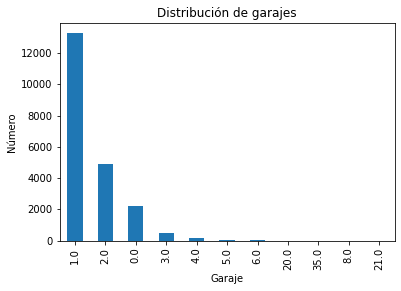

In [16]:
df_2['garaje'].value_counts().plot(kind='bar')
plt.title('Distribución de garajes')
plt.xlabel('Garaje')
plt.ylabel('Número')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

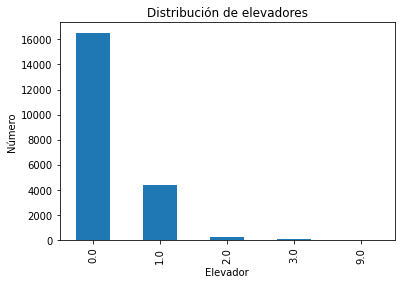

In [17]:
df_2['elevador'].value_counts().plot(kind='bar')
plt.title('Distribución de elevadores')
plt.xlabel('Elevador')
plt.ylabel('Número')
sns.despine

Text(0, 0.5, 'Área')

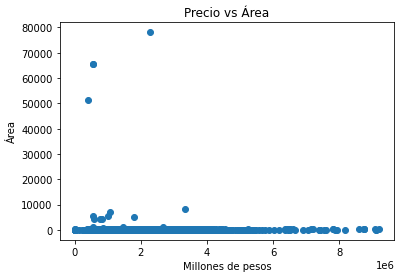

In [18]:
plt.scatter(df_2.Precio,df_2.area)
plt.title("Precio vs Área")
plt.xlabel('Millones de pesos')
plt.ylabel('Área')

In [19]:
df_2.loc[df_2['area']>1000]
  #, 'antigüedad']=df_1.antigüedad.subtract(2023)
#df_1.describe()

,fuente,ciudad,zona_mediana,tipo,Precio,area,garaje,elevador,antigüedad
1224,TypeformMX,Ciudad de México,guerrero i,departamento_en_condominio_o_unidad_habitacional,1448750.0,1160.0,2.0,1.0,25
1873,TypeformMX,Ciudad de México,espartaco,departamento_en_condominio_o_unidad_habitacional,2286000.0,78120.0,2.0,0.0,35
3546,WEB,Tecámac,zm_15_zm101,departamento_en_condominio_o_unidad_habitacional,558138.0,1200.0,2.0,0.0,9
3896,TypeformMX,Ciudad de México,roma sur i,departamento_en_condominio_o_unidad_habitacional,3351000.0,8440.0,1.0,0.0,8
5733,Okol landing,Zumpango,zm_15_zm900,casa_en_condominio,393585.0,51367.0,1.0,0.0,12
8658,TypeformMX,Ixtapaluca,zm_15_zm309,departamento_en_condominio_o_unidad_habitacional,550000.0,5549.0,1.0,0.0,25
11490,TypeformMX,Ciudad de México,tacuba,departamento_en_edificio_solo,1785000.0,5159.0,1.0,0.0,4
14249,WEB,Coacalco de Berriozábal,zm_15_zm70,departamento_en_condominio_o_unidad_habitacional,540300.0,65417.0,1.0,0.0,25
17449,TypeformMX,Ciudad de México,pensador mexicano i,departamento_en_edificio_solo,1005000.0,5521.0,0.0,0.0,20
17649,TypeformMX,Ciudad de México,paulino navarro,departamento_en_condominio_o_unidad_habitacional,810000.0,4240.0,0.0,0.0,35


Text(0, 0.5, 'Área')

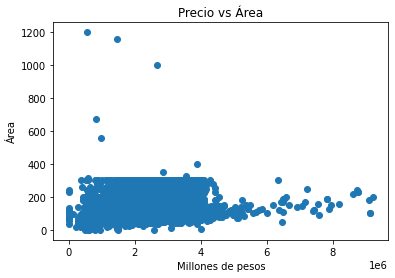

In [20]:
plt.scatter(df_2.loc[df_2['area']<2000, 'Precio'], df_2.loc[df_2['area']<2000, 'area'])
plt.title("Precio vs Área")
plt.xlabel('Millones de pesos')
plt.ylabel('Área')

Text(0, 0.5, 'Precio en millones de pesos')

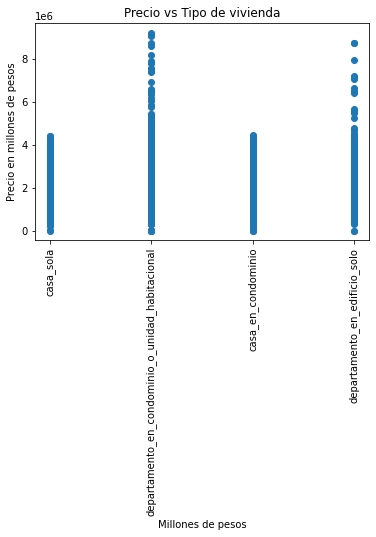

In [21]:
plt.scatter(df_2.tipo, df_2.Precio)
plt.title("Precio vs Tipo de vivienda")
plt.xlabel('Millones de pesos')
plt.xticks(rotation=90)
plt.ylabel('Precio en millones de pesos')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


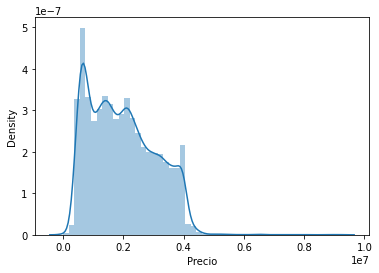

In [22]:
import seaborn as sns
sns.distplot(df_2['Precio']);

In [23]:
df_2['ciudad'].value_counts(dropna=False)


Ciudad de México                 12453
Zapopan                            975
Tecámac                            961
Ecatepec de Morelos                793
Tlajomulco de Zúñiga               613
                                 ...  
Ixtlahuacán de los Membrillos        1
Yautepec                             1
Calimaya                             1
San Pedro Garza García               1
Atenco                               1
Name: ciudad, Length: 66, dtype: int64

In [24]:
ciudades_pop=df_2.groupby(['ciudad']).count().sort_values(by='fuente', ascending=False)
ciudades_pop.index

Index(['Ciudad de México', 'Zapopan', 'Tecámac', 'Ecatepec de Morelos',
       'Tlajomulco de Zúñiga', 'Cuautitlán Izcalli', 'Coacalco de Berriozábal',
       'Tlalnepantla de Baz', 'Atizapán de Zaragoza', 'Guadalajara',
       'Tultitlán', 'Ixtapaluca', 'Zumpango', 'Tizayuca', 'Huehuetoca',
       'Nezahualcóyotl', 'Cuautitlán', 'Tonalá', 'San Mateo Atenco', 'Chalco',
       'Toluca', 'Huixquilucan', 'San Pedro Tlaquepaque', 'Metepec',
       'Guadalupe', 'Tultepec', 'Naucalpan de Juárez', 'Pachuca de Soto',
       'Monterrey', 'Acolman', 'Chicoloapan', 'Valle de Chalco Solidaridad',
       'Mineral de la Reforma', 'Juárez', 'García', 'General Escobedo',
       'Zempoala', 'Nextlalpan', 'Apodaca', 'Nicolás Romero', 'Querétaro',
       'El Marqués', 'Veracruz', 'San Nicolás de los Garza', 'Zinacantepec',
       'El Salto', 'La Paz', 'San Antonio la Isla', 'General Zuazua',
       'Chimalhuacán', 'Zapotlán de Juárez', 'Boca del Río', 'Lerma',
       'Texcoco', 'Melchor Ocampo', 'Salinas

In [25]:
ciudades=['Ciudad de México', 'Zapopan', 'Tecámac', 'Ecatepec de Morelos',
       'Tlajomulco de Zúñiga', 'Cuautitlán Izcalli', 'Coacalco de Berriozábal',
       'Tlalnepantla de Baz', 'Atizapán de Zaragoza', 'Guadalajara']
df_2.loc[df_2['ciudad'].isin(ciudades)].head()

,fuente,ciudad,zona_mediana,tipo,Precio,area,garaje,elevador,antigüedad
0,Ventana,Ciudad de México,san andres tetepilco (pblo),casa_sola,3516483.52,200.0,1.0,0.0,30
2,Ventana,Ciudad de México,nueva sta anita,departamento_en_condominio_o_unidad_habitacional,1895790.00,65.0,0.0,0.0,20
4,Ventana,Ciudad de México,el vergel,casa_en_condominio,3923500.00,80.0,1.0,0.0,1
5,Ventana,Ciudad de México,la patera-condomodulos (u hab),departamento_en_condominio_o_unidad_habitacional,1575200.00,66.0,1.0,0.0,19
8,Ventana,Coacalco de Berriozábal,zm_15_zm69,departamento_en_condominio_o_unidad_habitacional,605000.00,68.0,1.0,0.0,31


Text(0, 0.5, 'Precio en millones de pesos')

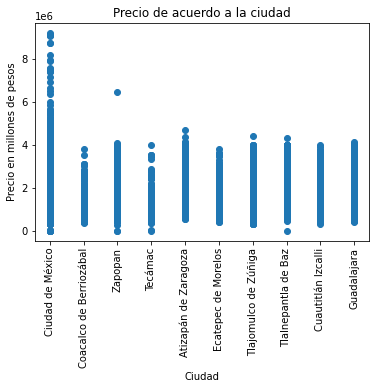

In [26]:
plt.scatter(df_2.loc[df_2['ciudad'].isin(ciudades), 'ciudad'], df_2.loc[df_2['ciudad'].isin(ciudades), 'Precio'])
plt.title("Precio de acuerdo a la ciudad")
plt.xlabel('Ciudad')
plt.xticks(rotation=90)
plt.ylabel('Precio en millones de pesos')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precio', ylabel='ciudad'>

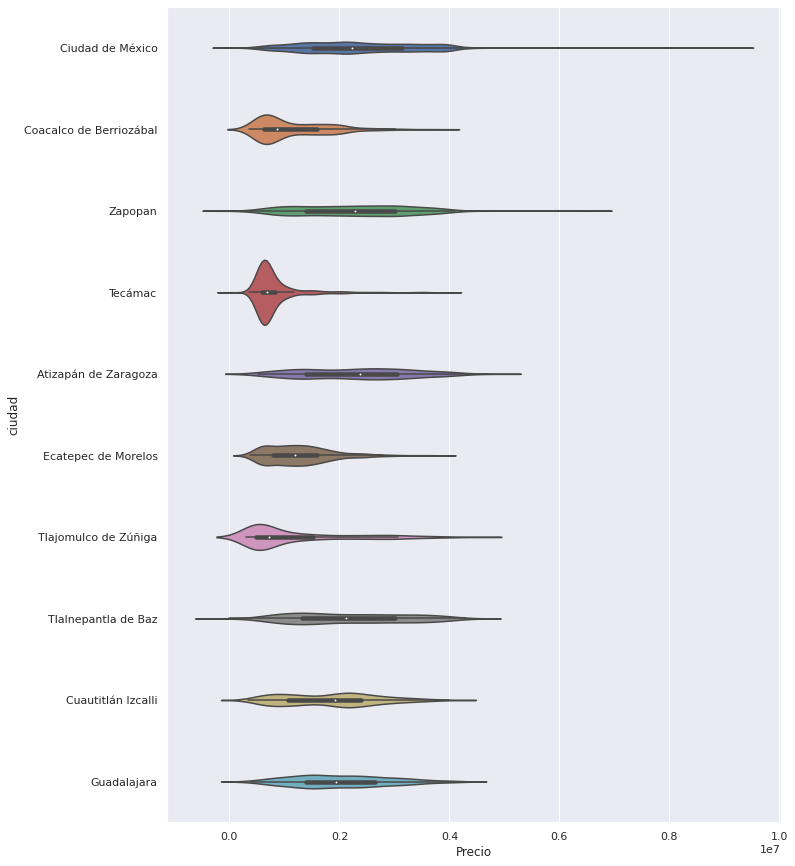

In [27]:
sns.set(rc={'figure.figsize':(11,15)})
sns.violinplot(df_2.loc[df_2['ciudad'].isin(ciudades), 'Precio'], df_2.loc[df_2['ciudad'].isin(ciudades), 'ciudad'])

In [28]:
df_2 = df_2.drop(df_2[(df_2.area>500) & (df_2.garaje>10)].index)
df_2=df_2.dropna()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21120 entries, 0 to 26712
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuente        21120 non-null  object 
 1   ciudad        21120 non-null  object 
 2   zona_mediana  21120 non-null  object 
 3   tipo          21120 non-null  object 
 4   Precio        21120 non-null  float64
 5   area          21120 non-null  float64
 6   garaje        21120 non-null  float64
 7   elevador      21120 non-null  float64
 8   antigüedad    21120 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


**Ajuste de modelos predictivos**

In [29]:
df_3=df_2.loc[df_2['ciudad']=='Ciudad de México']

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [52]:
X= df_3.drop(['Precio','zona_mediana', 'fuente','ciudad'] , axis=1)
Y=df_3['Precio']
X=pd.get_dummies(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
reg = LinearRegression().fit(X_train, y_train)

In [55]:
y_train_predict_reg = reg.predict(X_train)

MSE = mean_squared_error(y_train,y_train_predict_reg)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(y_train,y_train_predict_reg)))

y_test_predict_reg = reg.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict_reg))
print("Pruebas: MSE ="+str(MSE))
print("Pruebas: R^2 ="+str(r2_score(y_test,y_test_predict_reg)))

df_predicciones_Reg = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict_reg, 'diferencia':y_test-y_test_predict_reg})
df_predicciones_Reg = df_predicciones_Reg.reset_index(drop = True)
df_predicciones_Reg.head(10)

Entrenamiento: MSE =742597315629.1262
Entrenamiento: R^2 =0.27113404770001714
Pruebas: MSE =890680643639.8204
Pruebas: R^2 =0.1624549985371634


,valor_real,prediccion,diferencia
0,2052000.0,2.025080e+06,2.692041e+04
1,1084189.0,2.132748e+06,-1.048559e+06
2,2140181.0,3.229376e+06,-1.089195e+06
3,3067647.0,3.238912e+06,-1.712646e+05
4,3200000.0,3.104401e+06,9.559887e+04
5,2302000.0,2.621718e+06,-3.197183e+05
6,2998600.0,2.483568e+06,5.150324e+05
7,1358300.0,2.050526e+06,-6.922263e+05
8,3229885.0,2.130960e+06,1.098925e+06
9,2850000.0,2.624731e+06,2.252688e+05


In [56]:
reg.coef_

array([ 8.03765908e-01,  4.78437751e+05,  6.15380389e+05,  6.04025059e+02,
        3.98347254e+04, -3.63649632e+04, -6.54406307e+04,  6.19708686e+04])

In [33]:
X

,area,garaje,elevador,antigüedad,tipo_casa_en_condominio,tipo_casa_sola,tipo_departamento_en_condominio_o_unidad_habitacional,tipo_departamento_en_edificio_solo
0,200.0,1.0,0.0,30,0,1,0,0
2,65.0,0.0,0.0,20,0,0,1,0
4,80.0,1.0,0.0,1,1,0,0,0
5,66.0,1.0,0.0,19,0,0,1,0
10,100.0,1.0,0.0,10,0,0,0,1
...,...,...,...,...,...,...,...,...
26702,75.0,1.0,1.0,0,0,0,0,1
26704,300.0,3.0,0.0,30,0,1,0,0
26706,60.0,1.0,2.0,2,0,0,1,0
26707,60.0,1.0,0.0,25,0,0,1,0


In [35]:
data = [{'area': 200, 'garaje': 1, 'elevador': 0, 'antigüedad': 30, 'tipo_casa_en_condominio': 0,'tipo_casa_sola': 1,'tipo_departamento_en_condominio_o_unidad_habitacional': 0,'tipo_departamento_en_edificio_solo': 0}]
w = pd.DataFrame(data)      
w


,area,garaje,elevador,antigüedad,tipo_casa_en_condominio,tipo_casa_sola,tipo_departamento_en_condominio_o_unidad_habitacional,tipo_departamento_en_edificio_solo
0,200,1,0,30,0,1,0,0


In [36]:
reg.predict(w)

array([2118897.00335712])

In [37]:
df_2['ciudad'].unique()
X

,area,garaje,elevador,antigüedad,tipo_casa_en_condominio,tipo_casa_sola,tipo_departamento_en_condominio_o_unidad_habitacional,tipo_departamento_en_edificio_solo
0,200.0,1.0,0.0,30,0,1,0,0
2,65.0,0.0,0.0,20,0,0,1,0
4,80.0,1.0,0.0,1,1,0,0,0
5,66.0,1.0,0.0,19,0,0,1,0
10,100.0,1.0,0.0,10,0,0,0,1
...,...,...,...,...,...,...,...,...
26702,75.0,1.0,1.0,0,0,0,0,1
26704,300.0,3.0,0.0,30,0,1,0,0
26706,60.0,1.0,2.0,2,0,0,1,0
26707,60.0,1.0,0.0,25,0,0,1,0


In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, y_train)
y_train_predict_poly = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(y_train,y_train_predict_poly)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(y_train,y_train_predict_poly)))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Pruebas: R^2 ="+str(r2_score(y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

#X_poly = poly_reg.fit_transform(X)
#pol_reg = LinearRegression()
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#pol_reg.fit(X_poly, Y)
#print(poly_reg.intercept_, poly_reg.coef_)

Entrenamiento: MSE =442056291862.4284
Entrenamiento: R^2 =0.5661177688670456
Pruebas: MSE =20539608578541.28
Pruebas: R^2 =-18.31427006952792


,valor_real,prediccion,diferencia
0,2052000.0,2.176077e+06,-1.240770e+05
1,1084189.0,1.594547e+06,-5.103582e+05
2,2140181.0,3.157992e+06,-1.017811e+06
3,3067647.0,2.689484e+06,3.781626e+05
4,3200000.0,3.386290e+06,-1.862896e+05
5,2302000.0,2.572462e+06,-2.704624e+05
6,2998600.0,2.882131e+06,1.164689e+05
7,1358300.0,1.785221e+06,-4.269210e+05
8,3229885.0,2.261340e+06,9.685454e+05
9,2850000.0,2.273861e+06,5.761392e+05


In [39]:
pol_reg.score(X_poly, Y)

0.5589056183272795

In [40]:

pol_reg.predict(poly_reg.fit_transform(w))

array([2855008.65047458])

In [66]:
dif = pd.DataFrame({'Valor actual': Y, 'Regresión': reg.predict(X), 'Polinomio':poly_model.predict(poly.fit_transform(X))})
dif

,Valor actual,Regresión,Polinomio
0,3516483.52,2.050620e+06,2.817162e+06
2,1895790.00,1.536957e+06,1.390890e+06
4,3923500.00,2.109206e+06,1.290755e+06
5,1575200.00,2.014792e+06,1.760267e+06
10,1497000.00,2.136794e+06,2.450300e+06
...,...,...,...
26702,2105000.00,2.746115e+06,3.042749e+06
26704,3952938.86,3.007575e+06,3.147241e+06
26706,1989600.00,3.235279e+06,2.370909e+06
26707,1758709.00,2.018411e+06,1.643249e+06


In [45]:
from sklearn.model_selection import train_test_split
#X_1= df_2.drop('Precio' , axis=1)
#Y_1=df_2['Precio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import RandomForestRegressor
bosque = RandomForestRegressor(n_estimators = 1000, random_state = 0)
bosque.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict = bosque.predict(X_train)

MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(y_train,y_train_predict)))

y_test_predict = bosque.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':y_test, 'prediccion':y_test_predict, 'diferencia':y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =129748309158.17079
Entrenamiento: R^2 =0.8726508661915051
Pruebas: MSE =431430471188.56757
Entrenamiento: R^2 =0.5943075251460577


,valor_real,prediccion,diferencia
0,2052000.0,1.958125e+06,9.387485e+04
1,1084189.0,1.348742e+06,-2.645526e+05
2,2140181.0,3.128677e+06,-9.884964e+05
3,3067647.0,2.499248e+06,5.683992e+05
4,3200000.0,3.766850e+06,-5.668504e+05
5,2302000.0,2.999071e+06,-6.970711e+05
6,2998600.0,2.379054e+06,6.195462e+05
7,1358300.0,2.266324e+06,-9.080244e+05
8,3229885.0,2.079777e+06,1.150108e+06
9,2850000.0,2.388458e+06,4.615417e+05
